In [35]:
import numpy as np
import scipy as sp
import matplotlib as mpl
from numpy import float32, float64
from numpy import linalg
import matplotlib.pyplot as plt
from functools import partial

In [36]:
label_font = 12
markersize = 8

## Task 1

In [51]:
def newton_diff_order_n(xs, ys):

    n = len(xs)

    if n == 1:
        return ys[0]
    elif n == 2:
        x1, x2 = xs
        y1, y2 = ys
        return (y2 - y1) / (x2 - x1)

    x0 = xs[0]
    xn = xs[-1]
    return (newton_diff_order_n(xs[1:], ys[1:]) - newton_diff_order_n(xs[0:-1], ys[0:-1])) / (xn - x0)

In [52]:
def newton_interpolation(xs, ys):
    current_poly = np.array([1.0])
    result_poly = np.array([0.0])

    for n, x in enumerate(xs):
        result_poly = np.polyadd(result_poly, newton_diff_order_n(xs[0:n + 1], ys[0:n + 1]) * current_poly)
        multiple_poly = np.array([1.0, -x])
        current_poly = np.polymul(current_poly, multiple_poly)

    return result_poly

In [53]:
def plot_points_and_poly(ax, xs, ys, poly, color: str = "blue"):

    num_points = 10000
    xs_linspace = np.linspace(min(xs), max(xs), num_points)

    ax.scatter(xs, ys, color=color)
    ax.plot(xs_linspace, np.polyval(poly, xs_linspace))

    ax.get_xaxis().set_visible(True)
    ax.get_yaxis().set_visible(True)

    ax.grid(True, which="both")
    ax.set_xlabel("$x$", fontsize=label_font)
    ax.set_ylabel("$y$", fontsize=label_font)

    plt.rcParams.update({"figure.autolayout": True})

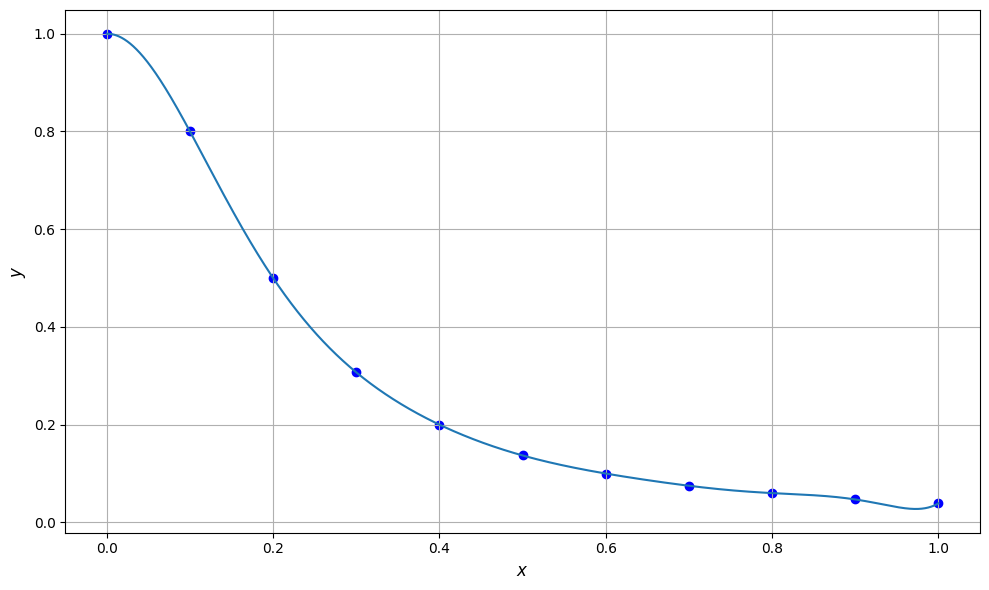

In [54]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

xs = np.array([0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
ys = np.array([1.0, 0.8, 0.5, 0.307, 0.2, 0.137, 0.1, 0.075, 0.06, 0.047, 0.039])
poly_x_t = newton_interpolation(xs, ys)

plot_points_and_poly(ax, xs, ys, poly_x_t)

fig.savefig("task1.png")

## Task 2

In [55]:
def get_l_k(xs, k) -> np.array:
    poly = np.array([1.0])
    div = 1.0

    for n, x in enumerate(xs):
        if n == k:
            continue

        poly = np.polymul(poly, np.array([1.0, -x]))
        div *= (xs[k] - xs[n])

    poly /= div
    return poly

In [56]:
def get_langrange_poly(xs, ys) -> np.array:
    result = np.array([0.0])
    for n, y in enumerate(ys):
        result = np.polyadd(result, get_l_k(xs, n) * y)
    return result

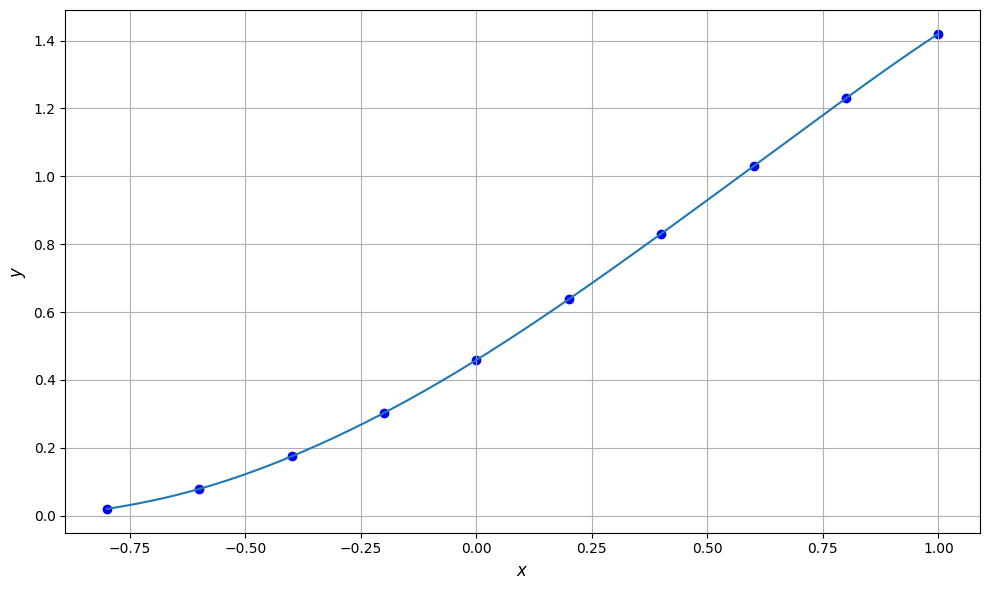

In [57]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

xs = np.array([-0.8, -0.6, -0.4, -0.2, 0.0, 0.2, 0.4, 0.6, 0.8, 1.0])
ys = np.array([0.02, 0.079, 0.175, 0.303, 0.459, 0.638, 0.831, 1.03, 1.23, 1.42])
poly_y_t = get_langrange_poly(xs, ys)

plot_points_and_poly(ax, xs, ys, poly_y_t)

fig.savefig("task2.png")

## Task 3

In [58]:
ts = np.linspace(-0.8, 1.0, 19)
ys = np.array([0.039, 0.047, 0.06, 0.075, 0.1, 0.137, 0.2, 0.307, 0.5, 0.8, 1.0])

poly_t_x = newton_interpolation(xs, ts)
poly_y_x = np.array([0.0])
current_pow = np.array([1.0])

for v in reversed(poly_y_t):
    poly_y_x = np.polyadd(poly_y_x, v * current_pow)
    current_pow = np.polymul(current_pow, poly_t_x)

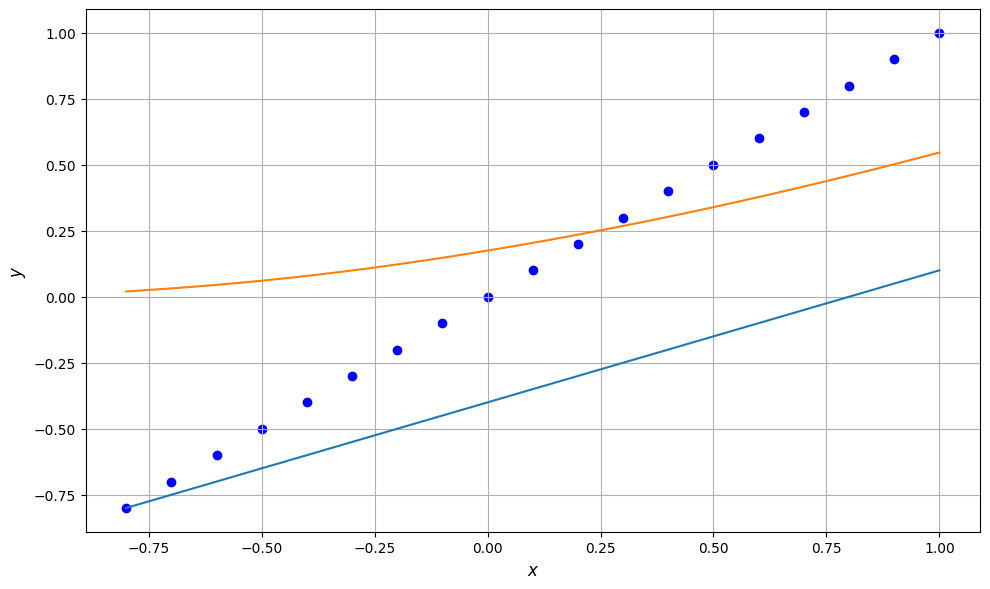

In [59]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

num_points = 100

plot_points_and_poly(ax, ts, ts, poly_t_x)
xs_linspace = np.linspace(min(xs), max(xs), num_points)
ax.plot(xs_linspace, np.polyval(poly_y_x, xs_linspace))

fig.savefig("task3.png")